# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | happy valley-goose bay
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | kapuskasing
Processing Record 4 of Set 1 | cromwell
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | dahanu
Processing Record 8 of Set 1 | las amilpas
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | wau
Processing Record 11 of Set 1 | kristiansund
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | hotan
Processing Record 17 of Set 1 | sarmiento
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | nar'yan-mar
Processing Record 22 of Set 1 | blackmans bay
Pr

Processing Record 35 of Set 4 | talca
Processing Record 36 of Set 4 | al-`ula
City not found. Skipping...
Processing Record 37 of Set 4 | tucuma
Processing Record 38 of Set 4 | vilyuchinsk
Processing Record 39 of Set 4 | znamenskoye
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | sao vicente
Processing Record 42 of Set 4 | badger
Processing Record 43 of Set 4 | hammerfest
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | hakui
Processing Record 46 of Set 4 | kulia village
City not found. Skipping...
Processing Record 47 of Set 4 | rosarito
Processing Record 48 of Set 4 | timbuktu
Processing Record 49 of Set 4 | la passe
Processing Record 0 of Set 5 | katsuren-haebaru
Processing Record 1 of Set 5 | jamaame
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | kijang
Processing Record 4 of Set 5 | imbituba
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | inari
Processing Record 7 of Set 5 | mhamid
Processin

Processing Record 23 of Set 8 | betio village
Processing Record 24 of Set 8 | aljezur
Processing Record 25 of Set 8 | sampit
Processing Record 26 of Set 8 | novodvinsk
Processing Record 27 of Set 8 | iquique
Processing Record 28 of Set 8 | ati
Processing Record 29 of Set 8 | waseca
Processing Record 30 of Set 8 | sterling
Processing Record 31 of Set 8 | san alberto
Processing Record 32 of Set 8 | bel ombre
Processing Record 33 of Set 8 | perelyub
Processing Record 34 of Set 8 | zonguldak
Processing Record 35 of Set 8 | rapid valley
Processing Record 36 of Set 8 | enewetak
Processing Record 37 of Set 8 | manismata
Processing Record 38 of Set 8 | simanggang
Processing Record 39 of Set 8 | williston
Processing Record 40 of Set 8 | priargunsk
Processing Record 41 of Set 8 | el nido
Processing Record 42 of Set 8 | mokhsogollokh
Processing Record 43 of Set 8 | divrigi
Processing Record 44 of Set 8 | minbu
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | cururupu
Proc

Processing Record 11 of Set 12 | sechura
Processing Record 12 of Set 12 | sena madureira
Processing Record 13 of Set 12 | tamanrasset
Processing Record 14 of Set 12 | alotau
City not found. Skipping...
Processing Record 15 of Set 12 | peiting
Processing Record 16 of Set 12 | malyye derbety
Processing Record 17 of Set 12 | guaruja
Processing Record 18 of Set 12 | revda
Processing Record 19 of Set 12 | cabedelo
Processing Record 20 of Set 12 | seryshevo
Processing Record 21 of Set 12 | holualoa
Processing Record 22 of Set 12 | linganore
Processing Record 23 of Set 12 | flying fish cove
Processing Record 24 of Set 12 | mojoagung
Processing Record 25 of Set 12 | kaysville
Processing Record 26 of Set 12 | selfoss
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,happy valley-goose bay,53.3168,53.3168,-7.83,62,40,9.26,CA,1700934166
1,iqaluit,63.7506,63.7506,-8.15,85,100,10.29,CA,1700934167
2,kapuskasing,49.4169,49.4169,1.05,51,20,7.72,CA,1700934168
3,cromwell,41.5951,41.5951,4.41,41,0,2.57,US,1700934168
4,puerto natales,-51.7236,-51.7236,15.25,41,20,13.38,CL,1700934168


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,53.3168,-7.83,62,40,9.26,CA,1700934166
1,iqaluit,63.7506,63.7506,-8.15,85,100,10.29,CA,1700934167
2,kapuskasing,49.4169,49.4169,1.05,51,20,7.72,CA,1700934168
3,cromwell,41.5951,41.5951,4.41,41,0,2.57,US,1700934168
4,puerto natales,-51.7236,-51.7236,15.25,41,20,13.38,CL,1700934168


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

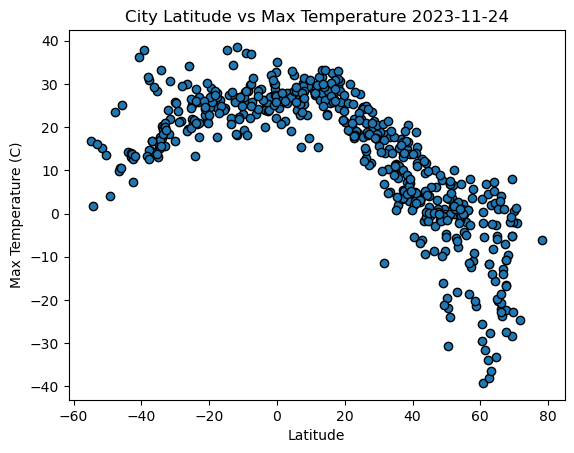

In [9]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

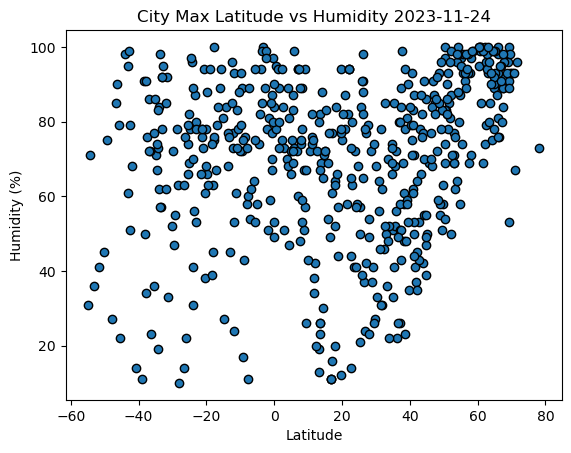

In [10]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

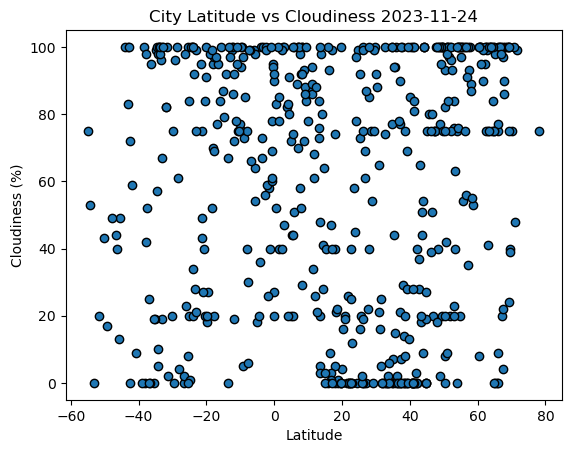

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

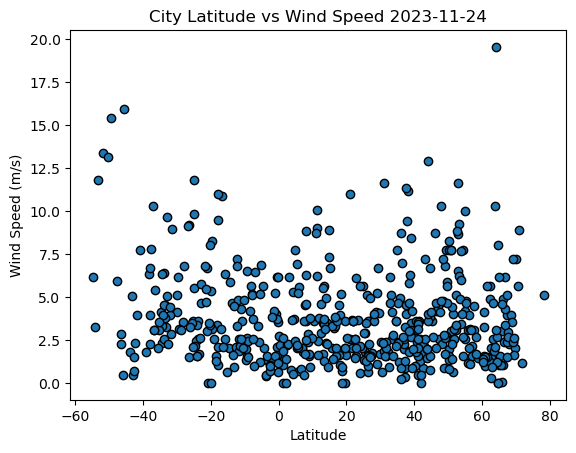

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,53.3168,-7.83,62,40,9.26,CA,1700934166
1,iqaluit,63.7506,63.7506,-8.15,85,100,10.29,CA,1700934167
2,kapuskasing,49.4169,49.4169,1.05,51,20,7.72,CA,1700934168
3,cromwell,41.5951,41.5951,4.41,41,0,2.57,US,1700934168
6,dahanu,19.9667,19.9667,25.68,75,4,1.60,IN,1700934169


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto natales,-51.7236,-51.7236,15.25,41,20,13.38,CL,1700934168
5,grytviken,-54.2811,-54.2811,1.86,71,53,3.23,GS,1700934168
12,avarua,-21.2078,-21.2078,25.03,78,75,6.69,CK,1700934170
13,port lincoln,-34.7333,-34.7333,15.60,71,99,4.12,AU,1700934170
16,sarmiento,-45.5882,-45.5882,25.20,22,49,15.96,AR,1700934171


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8616555684124307


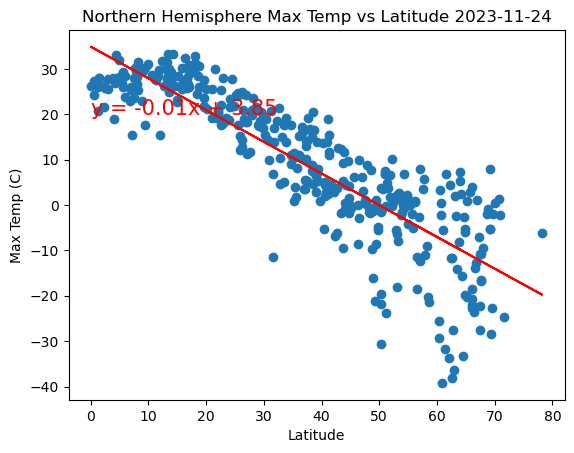

In [16]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Max Temp vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (0,20), fontsize = 15, color="red")

#Print results
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.586826354330361


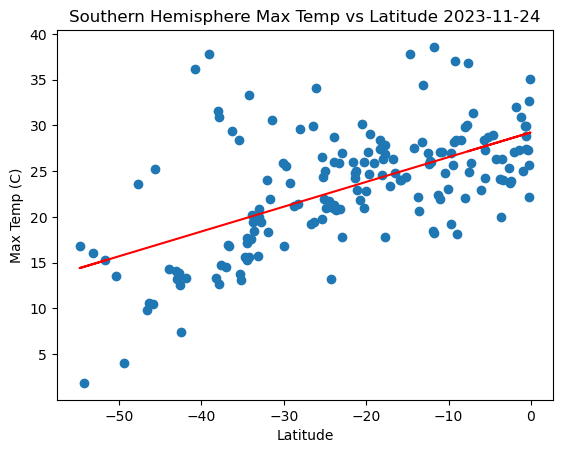

In [17]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Max Temp vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-30,280), fontsize = 15, color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between temperature and latitude in the northern and southern hemispheres. Temperature does increase with proximity to the equator, based on random data samples. The northern hemisphere shows a strongly negative correlation, indicating the temperatures drop as you move north away from the equator, and the southern hemisphere shows a medium to strongly positive correlation, indicating that temperatures rise as you move closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.38458331643923765


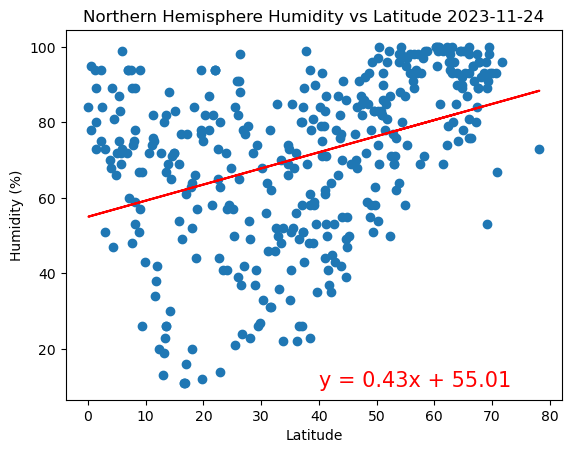

In [18]:
#Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Humidity vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()



The r-value is: 0.20335747514946767


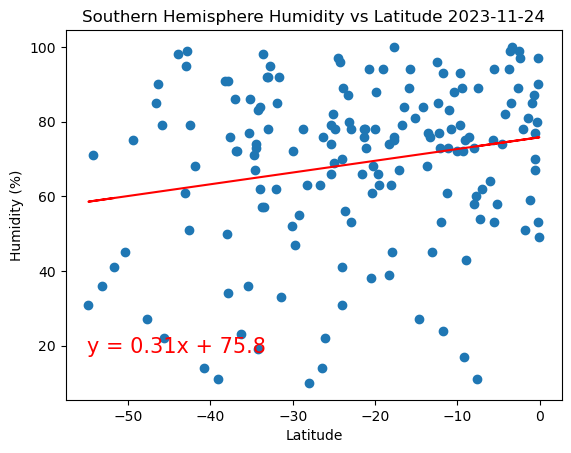

In [19]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Humidity vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,18), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()



**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity in the northern and southern hemispheres. There is a slightly positive correlation in the southern hemisphere, suggesting that humidity increases as you approach the equator, but the opposite is represented by the data in the northern hemisphere, showing a positive correlation away from the equator and towards the north pole. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.159517643660711


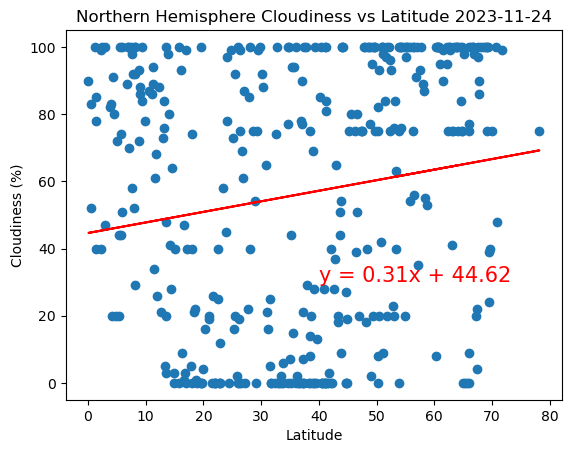

In [25]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Cloudiness vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (40,30), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.2244171504476525


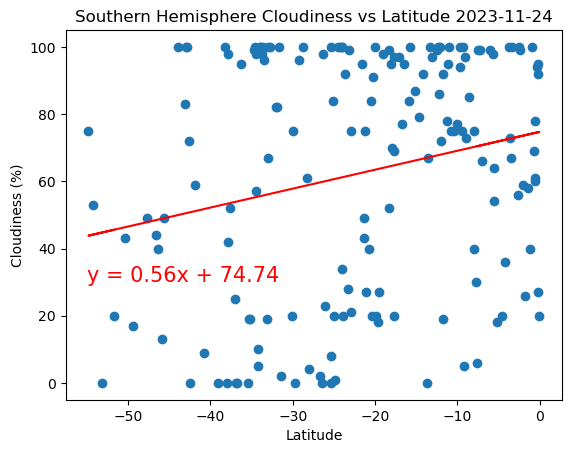

In [26]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Cloudiness vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,30), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between cloudiness and latitude in both the northern and southern hemispheres. In other words, closeness to the equator likely does not influence the level of cloudiness. It does appear that there are higher levels of cloud coverage at the extremes: both at the equator and at the north and south poles, with higher frequency at the poles. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08838249396062225


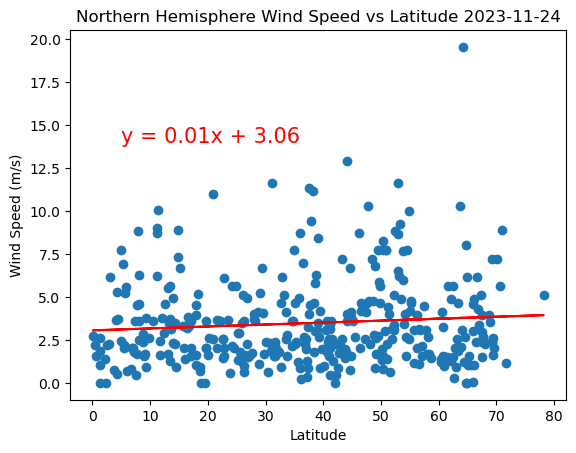

In [27]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Wind Speed vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (5,14), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3180982792086985


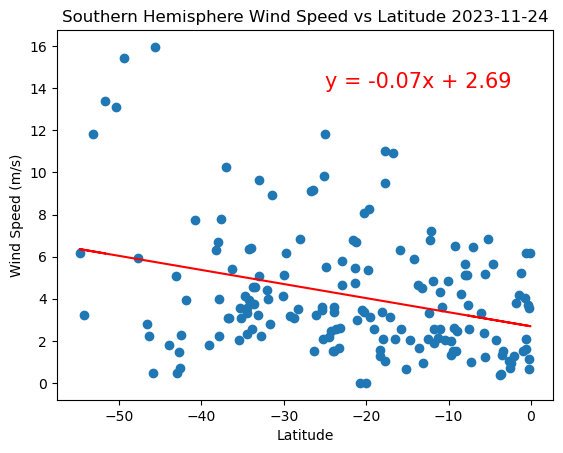

In [28]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Wind Speed vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,14), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and latitude in the northern and southern hemispheres. Proximity to the equator likely does not affect wind speed. 